In [1]:
%pip install -q "plotly==6.1.1" "kaleido==1.2.0"


[notice] A new release of pip is available: 24.3.1 -> 25.3
[notice] To update, run: pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


In [2]:
import plotly

print(f"Plotly version: {plotly.__version__}")

Plotly version: 6.1.1


In [3]:
import plotly.io as pio

# Render Plotly figures as static PNGs so GitHub can display them
pio.renderers.default = "png"
if pio.kaleido:
    pio.kaleido.scope.default_format = "png"
    pio.kaleido.scope.default_width = 900
    pio.kaleido.scope.default_height = 500
else:
    print("Kaleido scope unavailable; install kaleido for static exports.")

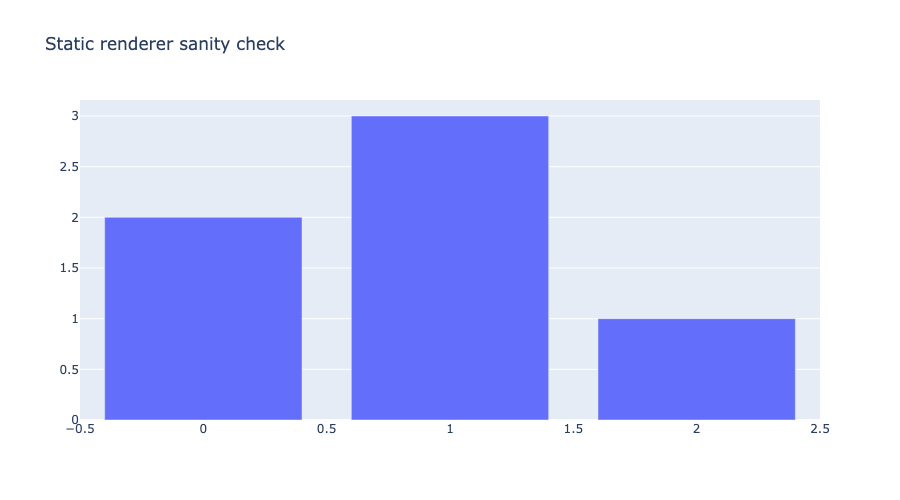

In [4]:
import plotly.graph_objects as go

_preview_fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
_preview_fig.update_layout(title="Static renderer sanity check")
_preview_fig.show()

In [5]:
import os
import re
import sys
import pandas as pd
import numpy as np
import csv
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [6]:
DATA_PATH = "data/Customers.csv"


def load_data(DATA_PATH):
    """ "loading data from csv file"""
    if os.path.exists(DATA_PATH):
        print(f"Loading file: {DATA_PATH}")
        return pd.read_csv(DATA_PATH)

    # fallback: find first csv in data folder
    print(f"'{DATA_PATH}' not found. Searching 'data/' for any .csv file...")
    for root, _, files in os.walk("data"):
        for file in files:
            if file.endswith(".csv"):
                found_path = os.path.join(root, file)
                print(f"Found and loading fallback file: {found_path}")
                return pd.read_csv(found_path)

    raise FileNotFoundError("No CSV file found in data directory.")


# --- tweak to print data as the dataframe---

try:
    # 1. Call your function to load the data
    df = pd.DataFrame(load_data(DATA_PATH))

    # 2. Display the first 5 rows of the DataFrame
    print("\n--- DataFrame Head ---")
    print(df.head())

except FileNotFoundError as e:
    print(f"\nError: {e}")

Loading file: data/Customers.csv

--- DataFrame Head ---
   CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6  


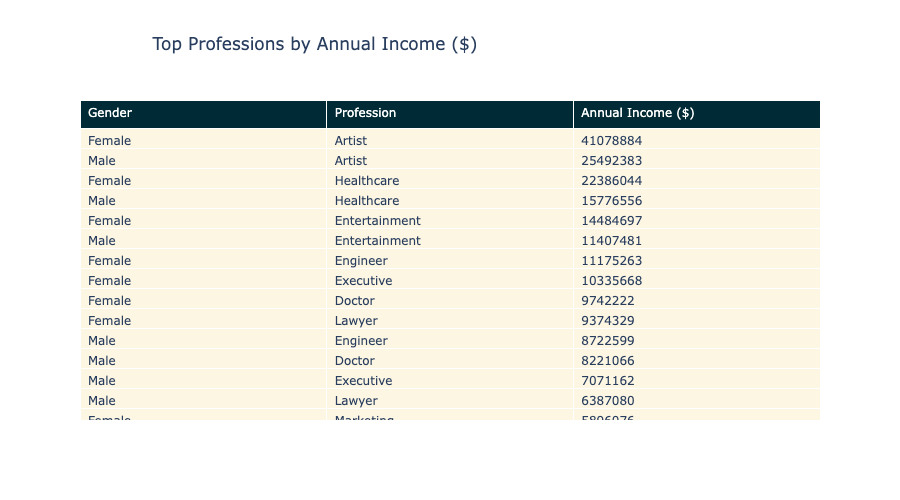

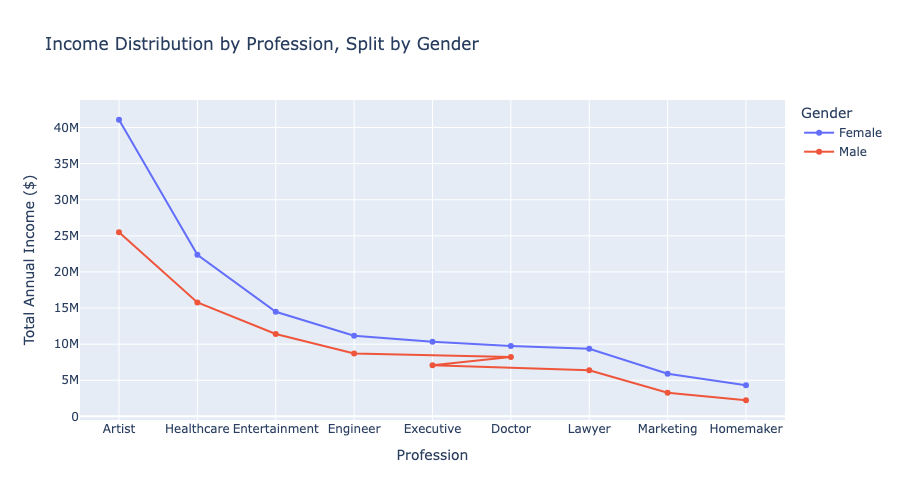

In [7]:
import plotly.graph_objects as go


Top = (
    df.groupby(["Gender", "Profession"])["Annual Income ($)"]
    .sum()
    .reset_index()
    .sort_values(by="Annual Income ($)", ascending=False)
)

# Table summarizing total income
fig = go.Figure(
    data=[
        go.Table(
            header=dict(
                values=["Gender", "Profession", "Annual Income ($)"],
                fill_color="#002b36",
                font=dict(color="white"),
                align="left",
            ),
            cells=dict(
                values=[Top["Gender"], Top["Profession"], Top["Annual Income ($)"]],
                fill_color=[["#fdf6e3"] * len(Top)] * 3,
                align="left",
            ),
        )
    ]
)
fig.update_layout(title_text="Top Professions by Annual Income ($)", title_x=0.35)
fig.show()


fig = px.line(
    Top,
    x="Profession",  # X-axis will be professions
    y="Annual Income ($)",  # Y-axis will be income
    color="Gender",  # Separate lines by gender and color them
    title="Income Distribution by Profession, Split by Gender",
    labels={"Annual Income ($)": "Total Annual Income ($)", "Profession": "Profession"},
)

fig.update_traces(
    mode="lines+markers"
)  # Add markers to make individual professions clear
fig.update_layout(hovermode="x unified")  # For a cleaner hover experience

fig.show()

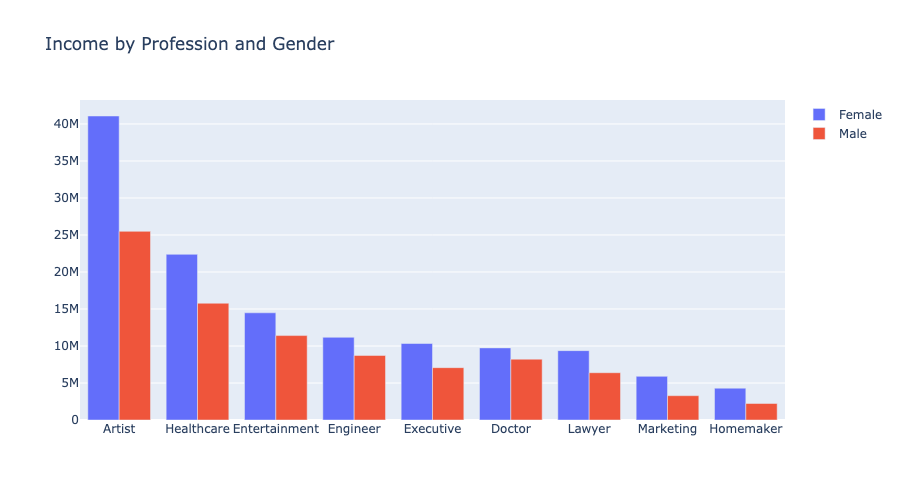

In [8]:
fig = go.Figure()

# Loop through genders to create a separate bar trace for each
for gender in Top["Gender"].unique():
    df_gender = Top[Top["Gender"] == gender]

    fig.add_trace(
        go.Bar(x=df_gender["Profession"], y=df_gender["Annual Income ($)"], name=gender)
    )

# Update layout to group the bars
fig.update_layout(barmode="group", title="Income by Profession and Gender")
fig.show()